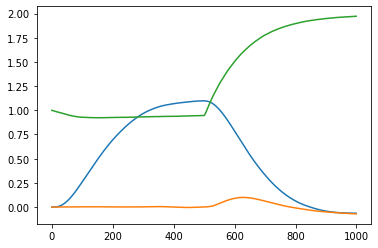

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from PyFlyt.core import Aviary

# initialize the log
log = np.zeros((1000, 3), dtype=np.float32)

# the starting position and orientations
start_pos = np.array([[0.0, 0.0, 1.0]])
start_orn = np.array([[0.0, 0.0, 0.0]])

# environment setup
env = Aviary(start_pos=start_pos, start_orn=start_orn, render=True, drone_type="quadx")

# set to position control
env.set_mode(7)

# for the first 500 steps, go to x=1, y=0, z=1
setpoint = np.array([1.0, 0.0, 0.0, 1.0])
env.set_setpoint(0, setpoint)

for i in range(500):
    env.step()

    # record the linear position state
    log[i] = env.state(0)[-1]

# for the next 500 steps, go to x=0, y=0, z=2, rotate 45 degrees
setpoint = np.array([0.0, 0.0, np.pi / 4, 2.0])
env.set_setpoint(0, setpoint)

for i in range(500, 1000):
    env.step()

    # record the linear position state
    log[i] = env.state(0)[-1]

# plot stuff out
plt.plot(np.arange(1000), log)
plt.show()

In [2]:
env.close()

AttributeError: module 'pybullet' has no attribute 'close'

In [1]:
def count_substrings_with_k_occurrences(s, k):
    n = len(s)
    freq = [0] * 26  # Assuming only lowercase alphabets are present
    count = 0
    distinct = 0

    for i in range(n):
        freq[ord(s[i]) - ord('a')] += 1

        if freq[ord(s[i]) - ord('a')] == k:
            distinct += 1

        while distinct > 0:
            freq[ord(s[count]) - ord('a')] -= 1
            if freq[ord(s[count]) - ord('a')] == k - 1:
                distinct -= 1
            count += 1

        count_temp = count
        while count_temp <= i:
            count_temp += 1
            count_temp_char = s[count_temp - 1]
            freq[ord(count_temp_char) - ord('a')] += 1
            if freq[ord(count_temp_char) - ord('a')] == k:
                distinct += 1
            if distinct > 0:
                count += 1
            else:
                break

        count_temp = count
        while count_temp <= i:
            count_temp_char = s[count_temp]
            if freq[ord(count_temp_char) - ord('a')] == k:
                count += 1
                count_temp += 1
            else:
                break

    return count

# Example usage:
string = "abcbca"
k = 2
print(count_substrings_with_k_occurrences(string, k)) 

IndexError: string index out of range